# Analysis 

> **WORK IN PROGRESS** Please note that the analysis in this notebook is subject to change as the review evolves.

This notebook contains the Python script that analyses the data extracted from the STRESS review.


* **TM Query**: There are quite a few NaN's in the data.  We need to clarify what is going on here. For example, a NaN in the model available section - I believe this should just be no.  Perhaps excluded because they completely ignored section 6?

## 1. Imports

### 1.1 Standard imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import Optional

# use gglot style for all matplotlib
plt.style.use("ggplot")

### 1.2 Review pipeline imports

In [2]:
from data_pipeline import load_review_dataset, filter_to_application_studies

## 2. Constants

In [3]:
# N/A

## 3. Utility functions

Some simple functions repeatedly used for plotting or analysing datasets.

In [4]:
# | code-fold: true
def frequency_bar_chart(
    data: pd.DataFrame,
    x_label: str,
    y_label: Optional[str] = "Frequency",
    rotate_x_ticks: Optional[int] = 0,
    figsize: Optional[int | int] = (12, 6),
):
    """
    Create bar chart of the selected categorical variable.
    Returns matplotlib figure and axis.

    Parameters:
    ---------
    data: pd.DataFrame
       Frequency dataset for bar chart

    x_label: str
        Label to display on x-axis

    y_label: str, optional (default = "Frequency")
        Label to display on y-axis

    rotate_x_ticks: int, optional (default = 0)
        Degress to rotate the x axis text (0 for no rotation)

    figsize: Tuple(int, int), optional (default=(12,6)
        The size of the matplotlib picture.

    Returns:
    -------
    out: fig and axis of plot
    """

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()

    ax = data.plot(kind="bar", ax=ax)

    _ = ax.set_xlabel(x_label)
    _ = ax.set_ylabel(y_label)

    # Add data labels on the bars
    _ = ax.bar_label(ax.containers[0], label_type="edge", padding=3)

    # rotate x axis text
    _ = plt.xticks(rotation=rotate_x_ticks)

    return fig, ax

## 4. Read and clean review data

In [5]:
clean_review = load_review_dataset()

In [6]:
# rows and columns n's
clean_review.shape

(165, 25)

## 5. Filter to empirical studies only 

Here we separate the studies that have used the STRESS guidelines in second dataframe i.e. limit to studies that have used STRESS for documenting a model. This is stored in a notebook level variable called `empirical_studies`

> **Reminder**: Filtering is done using the 'used' field.  Details are available in the [filtering notebook](./02_filtering)

In [7]:
empirical_studies = filter_to_application_studies(clean_review)

In [8]:
# number of studies that used STRESS as intended i.e. to document
empirical_studies.shape

(73, 25)

## 6. Results

### Year of publication


::: {.callout-note collapse="true"}
## TM notes for additional analysis

* **TM Query (1)**: 2024 obviously partial, as it will take us a while to do this study we should update again in 2025 to get all 2024 papers if we can

*  **TM Query (2)**: WE should prob show no. citations OVERALL by year as well
:::


In [9]:
def figure_1(data: pd.DataFrame, figsize: Optional[int | int] = (12, 6)):
    """
    Create bar chart of publications by year (ordered)

    Parameters:
    ---------
    data: pd.DataFrame
        The cleaned + filtered review data to plot

    figsize = Tuple(int, int)
        Size of matplotlib figure

    Returns:
    -------
    out: fig and axis of plot
    """

    # The frequency of papers that have used STRESS guidelines
    # based on the publication year
    year_freq = data["year"].value_counts(dropna=False).sort_index(ascending=True)

    return frequency_bar_chart(
        data=year_freq, x_label="Year", y_label="Publications"
    )

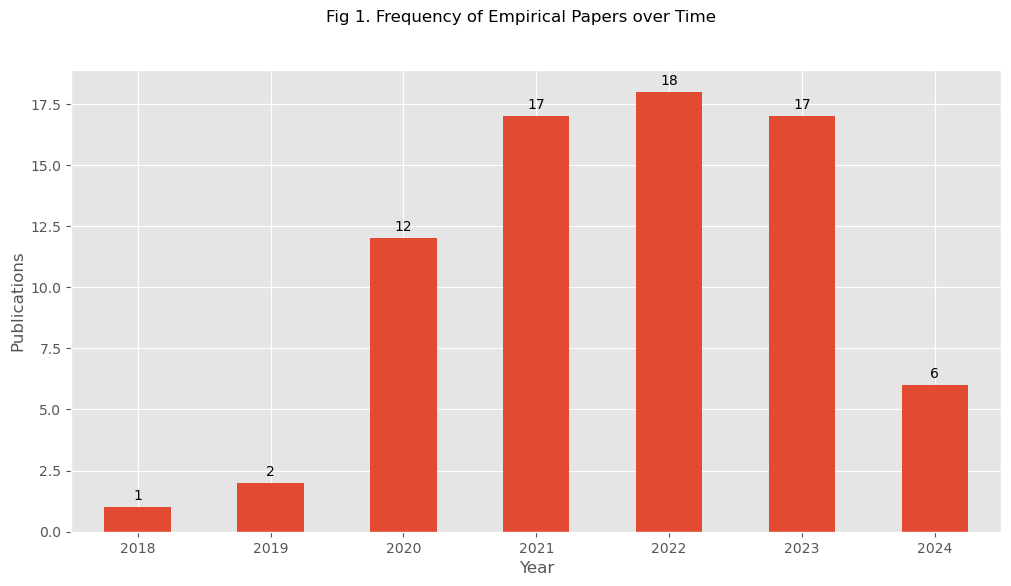

In [10]:
fig, ax = figure_1(empirical_studies, False)
fig.savefig("./figures/figure_1.png", dpi=300, bbox_inches="tight")
_ = fig.suptitle("Fig 1. Frequency of Empirical Papers over Time")

### Simulation method 

::: {.callout-note collapse="true"}
## Data notes

Hybrid M&S could be the hybridisation of simulation methods (e.g. SD+DES) or hybridisation of a simulation method with data science approach (e.g. Monte Carlo simulation + Machine learning)
:::

In [11]:
def figure_2(data: pd.DataFrame, figsize: Optional[int | int] = (12, 6)):
    """
    Create bar chart of simulation method used in studies

    Parameters:
    ---------
    data: pd.DataFrame
        The cleaned + filtered review data to plot

    figsize = Tuple(int, int)
        Size of matplotlib figure

    Returns:
    -------
    out: fig and axis of plot
    """

    method_freq = data["method"].value_counts(dropna=False)

    return frequency_bar_chart(
        data=method_freq, x_label="Method", y_label="Frequency"
    )

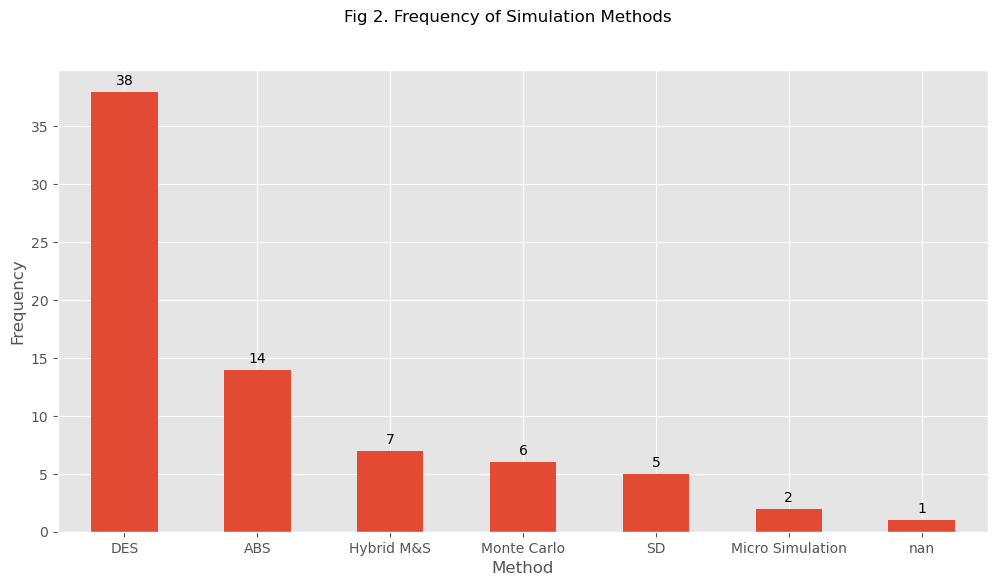

In [12]:
fig, ax = figure_2(empirical_studies, False)
fig.savefig("./figures/figure_2.png", dpi=300, bbox_inches="tight")
_ = fig.suptitle("Fig 2. Frequency of Simulation Methods")

### Application area

In [13]:
def figure_3(data: pd.DataFrame, figsize: Optional[int | int] = (12, 6)):
    """Frequency of software/coding language usage as bar chart

    Parameters:
    ---------
    data: pd.DataFrame
        The cleaned + filtered review data to plot

    figsize = Tuple(int, int)
        Size of matplotlib figure

    Returns:
    -------
    out: fig and axis of plot
    """

    freq = data["application_area"].value_counts(dropna=False)

    return frequency_bar_chart(
        data=freq,
        x_label="Application area",
        y_label="Frequency",
        rotate_x_ticks=90,
    )

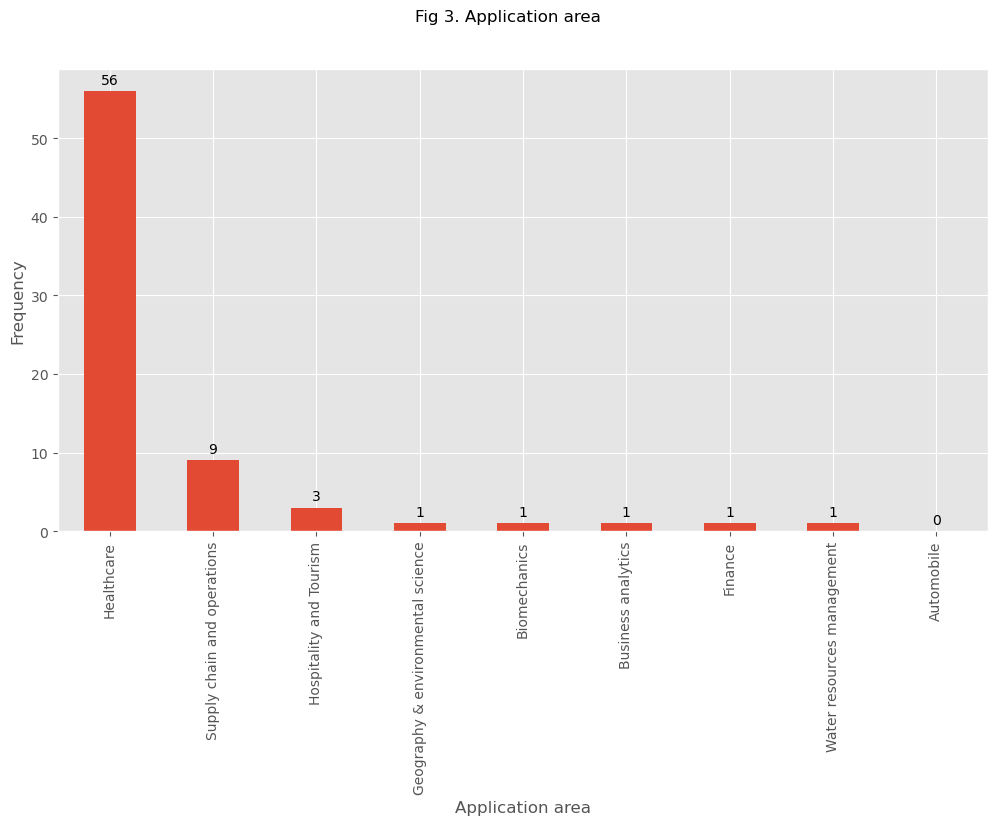

In [14]:
fig, ax = figure_3(empirical_studies, False)
fig.savefig("./figures/figure_3.png", dpi=300, bbox_inches="tight")
_ = fig.suptitle("Fig 3. Application area")

### Article Type

In [15]:
def figure_4(data: pd.DataFrame, figsize: Optional[int | int] = (12, 6)):
    """Frequency of software/coding language usage as bar chart

    Parameters:
    ---------
    data: pd.DataFrame
        The cleaned + filtered review data to plot

    figsize = Tuple(int, int)
        Size of matplotlib figure

    Returns:
    -------
    out: fig and axis of plot
    """

    freq = data["type_of_paper"].value_counts(dropna=False)

    return frequency_bar_chart(
        data=freq,
        x_label="Application area",
        y_label="Frequency",
        rotate_x_ticks=0,
    )

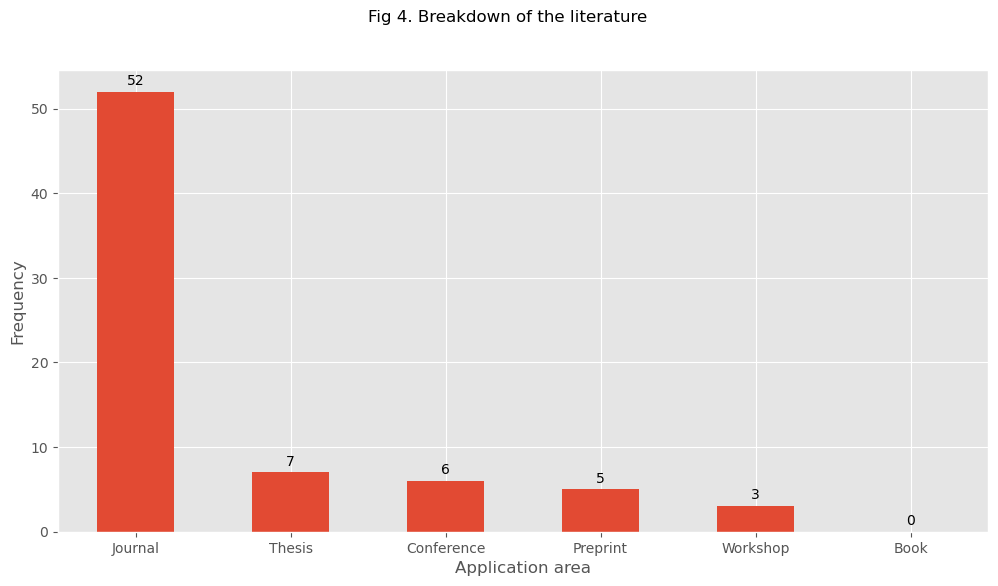

In [16]:
fig, ax = figure_4(empirical_studies, False)
fig.savefig("./figures/figure_4.png", dpi=300, bbox_inches="tight")
_ = fig.suptitle("Fig 4. Breakdown of the literature")

### How was STRESS used?

The guideline have been listed either in main text, or in appendix. Also it might be in the form of checklist, structured (that contains the guidelines' elements with  description), and unstructured (which might contain some elements of the guideline).

In [17]:
def figure_4(data: pd.DataFrame, figsize: Optional[int | int] = (12, 6)):
    """Frequency of type of paper

    Type of papers that have used STRESS; which includes journal, conference,
    workshop, and preprints papers as well as thesis.

    Parameters:
    ---------
    data: pd.DataFrame
        The cleaned + filtered review data to plot

    figsize = Tuple(int, int)
        Size of matplotlib figure

    Returns:
    -------
    out: fig and axis of plot
    """

    freq = data["stress_implementation"].value_counts(dropna=False)

    return frequency_bar_chart(
        data=freq, x_label="Approach", y_label="Frequency", rotate_x_ticks=90
    )

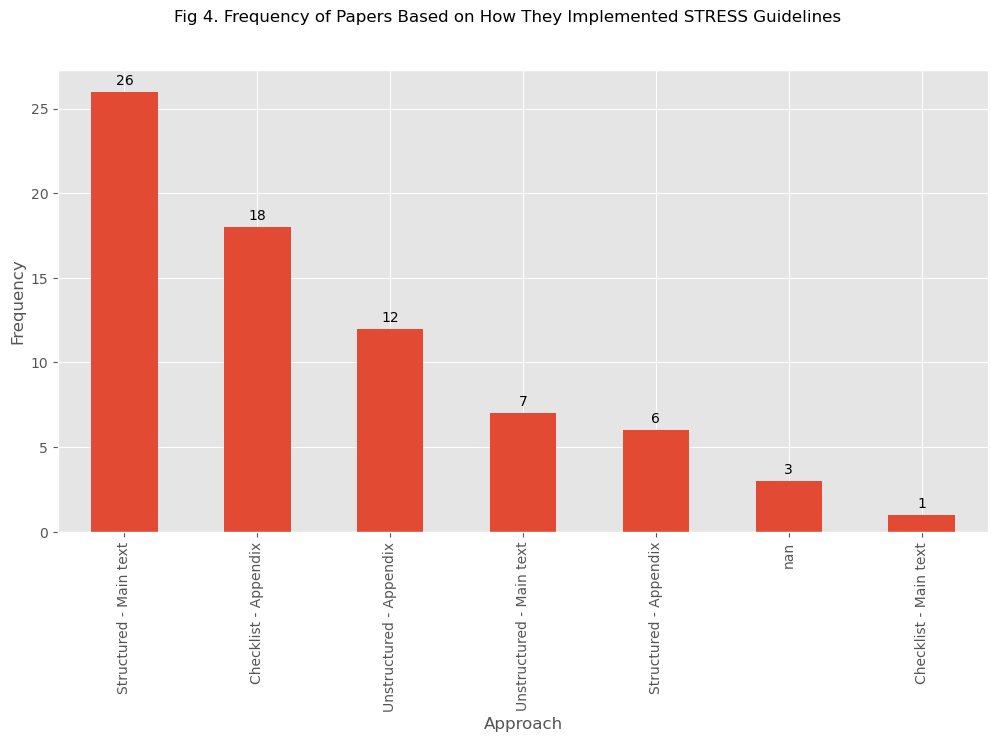

In [18]:
fig, ax = figure_4(empirical_studies, False)
fig.savefig("./figures/figure_4.png", dpi=300, bbox_inches="tight")
_ = fig.suptitle(
    "Fig 4. Frequency of Papers Based on How They Implemented STRESS Guidelines"
)

### Usage by Journal/conference/other

> **TM query**: Computational Management Science appears twice? small different in raw data recording?

>  **TM query**: There are 3 univrsity of southampton and 2 Lancaster Uni publications. I think we need to double check that we are not double counting with academic journals or conference papers.

In [19]:
Journal_freq = empirical_studies["journal"].value_counts(dropna=False)

Journal_freq = Journal_freq.reset_index()
Journal_freq.columns = ["Journal", "Frequency"]

Journal_freq.set_index(["Journal"], inplace=True)

# Print the resulting DataFrame
Journal_freq

,Frequency
Journal,
Journal of Simulation,11
Winter Simulation Conference,6
BMJ,4
University of Southampton,3
Proceedings of the Operational Research Society Simulation Workshop,3
Operations Research for Health Care,3
JAMA,2
Lancaster University,2
Healthcare,2


### Full versus partial usage of STRESS sections

> TM note - we should provide %'s as well as counts

In [20]:
Partially_freq = empirical_studies["partially"].value_counts()

Partially_freq = Partially_freq.reset_index()
Partially_freq.columns = ["Partially?", "Frequency"]

# Print the resulting DataFrame
Partially_freq

,Partially?,Frequency
0,Yes,45
1,No,25
2,DP,0


### Is the coded model available?

> TM note: cannot be shared for confidential reasons. I think this should be recoded to = "No"

> TM note: will be available in the future should be recoded as "No"

> TM: note: the NaN's should be recoded as "No" ?


In [21]:
empirical_studies["source_code_access"].value_counts(dropna=False)

source_code_access
NaN                                            33
Yes                                            23
Upon request                                   11
No                                              3
Will be available in future                     2
Cannot be shared due to confidential reason     1
Name: count, dtype: int64

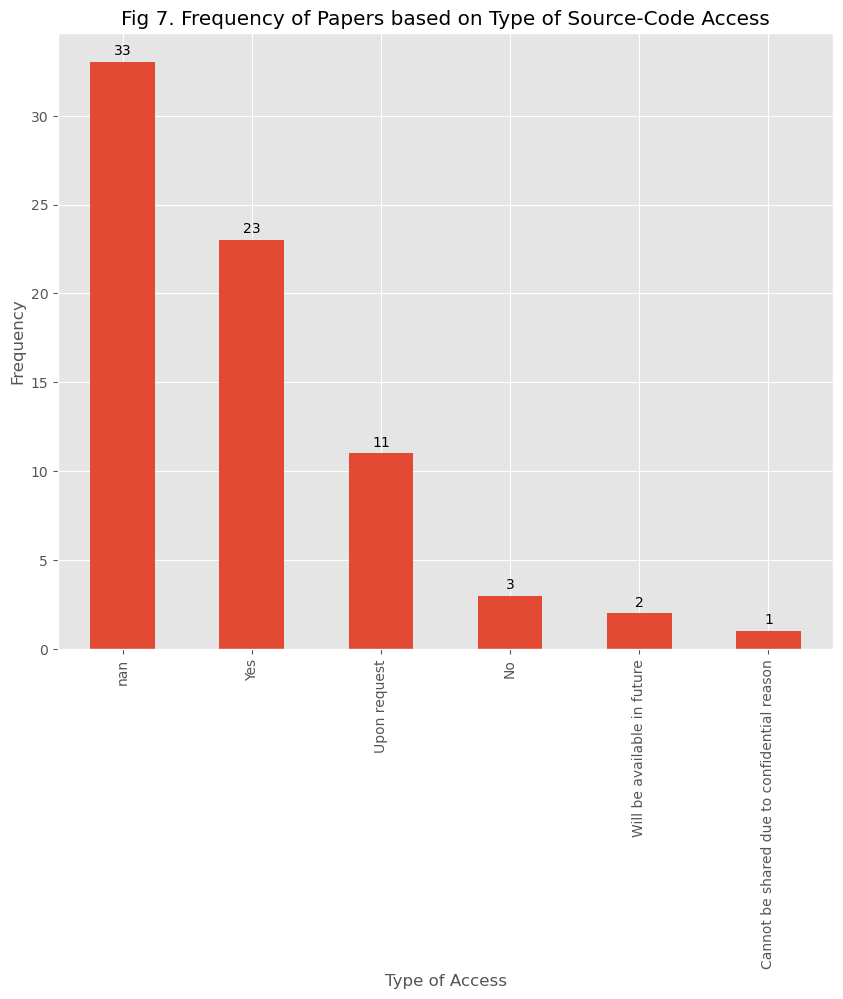

In [22]:
code_access_freq = empirical_studies["source_code_access"].value_counts(dropna=False)

plt.figure(figsize=(10, 8))
SCAB = code_access_freq.plot(kind="bar")

plt.title("Fig 7. Frequency of Papers based on Type of Source-Code Access")
plt.xlabel("Type of Access")
plt.ylabel("Frequency")

# Add data labels on the bars
SCAB.bar_label(SCAB.containers[0], label_type="edge", padding=3)

plt.show()

### How many of the publications contain at least one author from STRESS 1.0?

> TM note: As finding target authors was manual we need at least one other person to repeat this process. We can then compare results.

In [23]:
empirical_studies['target_authors'].value_counts(dropna=False)

target_authors
No     59
Yes    14
Name: count, dtype: int64